# **Automatidata project**
**Course 5 - Regression Analysis: Simplify complex data relationships**

The data consulting firm Automatidata has recently hired you as the newest member of their data analytics team. Their newest client, the NYC Taxi and Limousine Commission (New York City TLC), wants the Automatidata team to build a multiple linear regression model to predict taxi fares using existing data that was collected over the course of a year. The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and A/B testing.

The Automatidata team has reviewed the results of the A/B testing. Now it’s time to work on predicting the taxi fare amounts. You’ve impressed your Automatidata colleagues with your hard work and attention to detail. The data team believes that you are ready to build the regression model and update the client New York City TLC about your progress.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# Course 5 End-of-course project: Build a multiple linear regression model

In this activity, you will build a multiple linear regression model. As you've learned, multiple linear regression helps you estimate the linear relationship between one continuous dependent variable and two or more independent variables. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed. 

Completing this activity will help you practice planning out and buidling a multiple linear regression model based on a specific business need. The structure of this activity is designed to emulate the proposals you will likely be assigned in your career as a data professional. Completing this activity will help prepare you for those career moments.
<br/>

**The purpose** of this project is to demostrate knowledge of EDA and a multiple linear regression model

**The goal** is to build a multiple linear regression model and evaluate the model
<br/>
*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a multiple linear regression model?

**Part 2:** Model Building and evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

# Build a multiple linear regression model

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## PACE: **Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.


### Task 1. Imports and loading
Import the packages that you've learned are needed for building linear regression models.

In [1]:
# Imports
# Packages for numerics + dataframes
import pandas as pd
import numpy as np
### YOUR CODE HERE ###

# Packages for visualization
import seaborn as sns
import matplotlib.pyplot as plt
### YOUR CODE HERE ###

# Packages for date conversions for calculating trip durations
from datetime import datetime
from datetime import date
from datetime import timedelta
### YOUR CODE HERE ###

# Packages for OLS, MLR, confusion matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from statsmodels.formula.api import ols
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
### YOUR CODE HERE ###

**Note:** `Pandas` is used to load the NYC TLC dataset. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into dataframe 
df0=pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv") 

<img src="images/Analyze.png" width="100" height="100" align=left>

## PACE: **Analyze**

In this stage, consider the following question where applicable to complete your code response:

* What are some purposes of EDA before constructing a multiple linear regression model?


==> ENTER YOUR RESPONSE HERE 

### Task 2a. Explore data with EDA

Analyze and discover data, looking for correlations, missing data, outliers, and duplicates.

Start with `.shape` and `.info()`.

In [3]:
# Start with `.shape` and `.info()`
df = df0
print(df.shape)
print(df.info())
### YOUR CODE HERE ###



(22699, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  flo

Check for missing data and duplicates using `.isna()` and `.drop_duplicates()`.

In [4]:
# Check for missing data and duplicates using .isna() and .drop_duplicates()
print(f'duplicated: {df.duplicated().sum()}')
df.isna().sum()
### YOUR CODE HERE ###

duplicated: 0


Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

Use `.describe()`.

In [5]:
# Use .describe()
df.describe().T
### YOUR CODE HERE ###
df[df['fare_amount'] <= 0] # passenger = 0? 

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
314,105454287,2,12/13/2017 2:02:39 AM,12/13/2017 2:03:08 AM,6,0.12,1,N,161,161,3,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8
1646,57337183,2,07/05/2017 11:02:23 AM,07/05/2017 11:03:00 AM,1,0.04,1,N,79,79,3,-2.5,0.0,-0.5,0.0,0.0,-0.3,-3.3
4402,108016954,2,12/20/2017 4:06:53 PM,12/20/2017 4:47:50 PM,1,7.06,1,N,263,169,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4423,97329905,2,11/16/2017 8:13:30 PM,11/16/2017 8:14:50 PM,2,0.06,1,N,237,237,4,-3.0,-0.5,-0.5,0.0,0.0,-0.3,-4.3
5448,28459983,2,04/06/2017 12:50:26 PM,04/06/2017 12:52:39 PM,1,0.25,1,N,90,68,3,-3.5,0.0,-0.5,0.0,0.0,-0.3,-4.3
5722,49670364,2,06/12/2017 12:08:55 PM,06/12/2017 12:08:57 PM,1,0.00,1,N,264,193,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5758,833948,2,01/03/2017 8:15:23 PM,01/03/2017 8:15:39 PM,1,0.02,1,N,170,170,3,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8
8204,91187947,2,10/28/2017 8:39:36 PM,10/28/2017 8:41:59 PM,1,0.41,1,N,236,237,3,-3.5,-0.5,-0.5,0.0,0.0,-0.3,-4.8
10281,55302347,2,06/05/2017 5:34:25 PM,06/05/2017 5:36:29 PM,2,0.00,1,N,238,238,4,-2.5,-1.0,-0.5,0.0,0.0,-0.3,-4.3
10506,26005024,2,03/30/2017 3:14:26 AM,03/30/2017 3:14:28 AM,1,0.00,1,N,264,193,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Task 2b. Convert pickup & dropoff columns to datetime


In [6]:
# Check the format of the data
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
### YOUR CODE HERE ###
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

In [7]:
# Convert datetime columns to datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
### YOUR CODE HERE ###

### Task 2c. Create duration column

Create a new column called `duration` that represents the total number of minutes that each taxi ride took.

In [8]:
# Create `duration` column
df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']) / np.timedelta64(1,'m')

### YOUR CODE HERE ###

### Outliers

Call `df.info()` to inspect the columns and decide which ones to check for outliers.

In [9]:
### YOUR CODE HERE ###
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

Keeping in mind that many of the features will not be used to fit your model, the most important columns to check for outliers are likely to be:
* `trip_distance`
* `fare_amount`
* `duration`



### Task 2d. Box plots

Plot a box plot for each feature: `trip_distance`, `fare_amount`, `duration`.

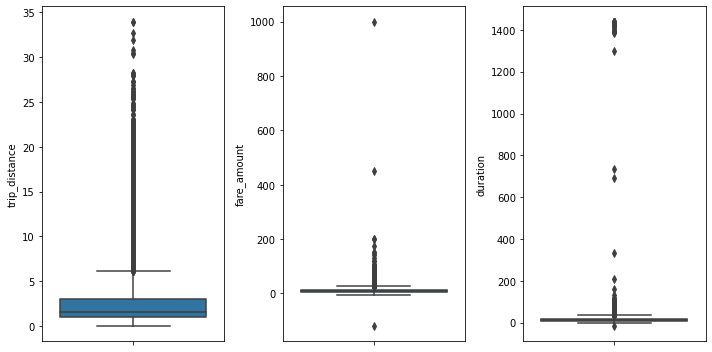

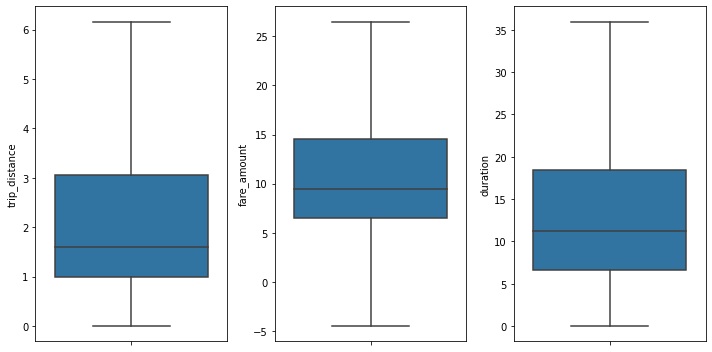

In [10]:
### YOUR CODE HERE ###
fig, axes = plt.subplots(1, 3, figsize = (10,5))

sns.boxplot(y = df['trip_distance'], ax = axes[0])
sns.boxplot(y = df['fare_amount'], ax = axes[1])
sns.boxplot(y = df['duration'], ax = axes[2])

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 3, figsize = (10,5))

sns.boxplot(y = df['trip_distance'], ax = axes[0], showfliers = False)
sns.boxplot(y = df['fare_amount'], ax = axes[1], showfliers = False)
sns.boxplot(y = df['duration'] , showfliers = False)

plt.tight_layout()
plt.show()

**Questions:** 
1. Which variable(s) contains outliers? 

2. Are the values in the `trip_distance` column unbelievable?

3. What about the lower end? Do distances, fares, and durations of 0 (or negative values) make sense?

==> ENTER YOUR RESPONSE HERE  
all of them   have some sort of outliers  
its common for trip distance to have that many outliers since not everyone is going to the same place  
trip ditance can't be 0 since that means the car didn't move, so does duration, 
generally fare_amount should be positive so it's also not commnon for fare amount be negative 


### Task 2e. Imputations

#### `trip_distance` outliers

You know from the summary statistics that there are trip distances of 0. Are these reflective of erroneous data, or are they very short trips that get rounded down?

To check, sort the column values, eliminate duplicates, and inspect the least 10 values. Are they rounded values or precise values?

In [11]:
# Are trip distances of 0 bad data or very short trips rounded down?
### YOUR CODE HERE ###
df_sort = df
df_sort_n0 = df[df['trip_distance'] != 0].reset_index(drop = True)
df_sort_y0 = df[df['trip_distance'] == 0].reset_index(drop = True)
print(df_sort_n0['trip_distance'].describe())
print(df['trip_distance'].describe())
df_sort_y0

count    22551.000000
mean         2.932433
std          3.657483
min          0.010000
25%          1.000000
50%          1.630000
75%          3.090000
max         33.960000
Name: trip_distance, dtype: float64
count    22699.000000
mean         2.913313
std          3.653171
min          0.000000
25%          0.990000
50%          1.610000
75%          3.060000
max         33.960000
Name: trip_distance, dtype: float64


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,52987734,1,2017-06-22 08:05:33,2017-06-22 08:05:40,1,0.0,3,N,231,231,2,20.0,0.0,0.0,0.00,0.0,0.3,20.30,0.116667
1,78660848,1,2017-09-18 20:50:53,2017-09-18 20:51:03,1,0.0,1,N,145,145,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80,0.166667
2,83480088,1,2017-10-04 19:46:24,2017-10-04 19:46:50,1,0.0,1,N,132,132,2,2.5,1.0,0.5,0.00,0.0,0.3,4.30,0.433333
3,14024301,1,2017-02-22 04:01:44,2017-02-22 04:01:53,1,0.0,1,N,90,90,3,2.5,0.5,0.5,0.00,0.0,0.3,3.80,0.150000
4,3767951,1,2017-01-14 07:00:26,2017-01-14 07:00:53,1,0.0,1,N,208,208,1,2.5,0.0,0.5,6.70,0.0,0.3,10.00,0.450000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,87078850,1,2017-10-16 08:34:07,2017-10-16 08:34:10,1,0.0,1,N,132,132,3,2.5,0.0,0.5,0.00,0.0,0.3,3.30,0.050000
144,62192517,2,2017-07-21 23:30:29,2017-07-21 23:31:12,1,0.0,5,N,163,163,1,16.8,0.0,0.0,3.42,0.0,0.3,20.52,0.716667
145,113244949,2,2017-01-07 04:48:42,2017-01-07 04:51:03,1,0.0,5,N,55,55,2,10.0,0.0,0.0,0.00,0.0,0.3,10.30,2.350000
146,19022898,2,2017-03-07 02:24:47,2017-03-07 02:24:50,1,0.0,1,N,264,193,1,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.050000


The distances are captured with a high degree of precision. However, it might be possible for trips to have distances of zero if a passenger summoned a taxi and then changed their mind. Besides, are there enough zero values in the data to pose a problem?

Calculate the count of rides where the `trip_distance` is zero.

In [12]:
### YOUR CODE HERE ###
df[df['trip_distance'] == 0]['trip_distance'].count()

148

#### `fare_amount` outliers

In [13]:
### YOUR CODE HERE ###
Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)
IQR = Q3 - Q1

# Finding outliers
outliers = df[(df['fare_amount'] < (Q1 - 1.5 * IQR)) | (df['fare_amount'] > (Q3 + 1.5 * IQR))]
outliers

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
6,37660487,2,2017-05-03 19:04:09,2017-05-03 20:03:47,1,12.83,1,N,79,241,1,47.50,1.0,0.5,9.86,0.00,0.3,59.16,59.633333
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.00,0.0,0.5,14.58,5.54,0.3,72.92,36.800000
21,85505540,2,2017-10-11 12:34:49,2017-10-11 13:22:38,1,12.30,5,N,138,265,1,68.25,0.0,0.0,12.00,16.26,0.3,96.81,47.816667
29,94052446,2,2017-11-06 20:30:50,2017-11-07 00:00:00,1,30.83,1,N,132,23,1,80.00,0.5,0.5,18.56,11.52,0.3,111.38,209.166667
32,63600506,2,2017-07-26 23:26:50,2017-07-26 23:55:49,1,14.32,1,N,132,149,2,40.50,0.5,0.5,0.00,0.00,0.3,41.80,28.983333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22645,58842954,1,2017-07-10 22:56:44,2017-07-10 23:25:16,1,7.90,1,N,249,41,1,27.50,0.5,0.5,2.00,0.00,0.3,30.80,28.533333
22668,14034918,2,2017-02-22 06:45:04,2017-02-22 07:19:34,5,25.30,1,N,181,132,1,67.50,0.0,0.5,17.08,0.00,0.3,87.33,34.500000
22676,105938763,2,2017-12-14 12:21:01,2017-12-14 12:56:21,1,9.47,1,N,138,263,1,32.00,0.0,0.5,6.00,5.76,0.3,44.56,35.333333
22686,9039930,2,2017-02-08 18:13:26,2017-02-08 19:34:11,5,10.64,1,N,170,70,1,52.00,1.0,0.5,14.84,5.54,0.3,74.18,80.750000


**Question:** What do you notice about the values in the `fare_amount` column?

Impute values less than $0 with `0`.

In [14]:
# Impute values less than $0 with 0
df['fare_amount'] = df['fare_amount'].apply(lambda x: 0 if x < 0 else x)
### YOUR CODE HERE ###

Now impute the maximum value as `Q3 + (6 * IQR)`.

In [15]:
"""### YOUR CODE HERE ###
    '''
    Impute upper-limit values in specified columns based on their interquartile range.
    
    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''
  ### YOUR CODE HERE ###
        # Reassign minimum to zero
        ### YOUR CODE HERE ###

        # Calculate upper threshold
        
     ### YOUR CODE HERE ###

        # Reassign values > threshold to threshold
      ### YOUR CODE HERE ###"""

"### YOUR CODE HERE ###\n    '''\n    Impute upper-limit values in specified columns based on their interquartile range.\n    \n    Arguments:\n        column_list: A list of columns to iterate over\n        iqr_factor: A number representing x in the formula:\n                    Q3 + (x * IQR). Used to determine maximum threshold,\n                    beyond which a point is considered an outlier.\n\n    The IQR is computed for each column in column_list and values exceeding\n    the upper threshold for each column are imputed with the upper threshold value.\n    '''\n  ### YOUR CODE HERE ###\n        # Reassign minimum to zero\n        ### YOUR CODE HERE ###\n\n        # Calculate upper threshold\n        \n     ### YOUR CODE HERE ###\n\n        # Reassign values > threshold to threshold\n      ### YOUR CODE HERE ###"

In [16]:
def outlier_imputer(column_list, iqr_factor):
    for col in column_list:
        df.loc[df[col] < 0, col] = 0
        
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_thresh = q3 + (iqr_factor * iqr)
        
        df.loc[df[col] > upper_thresh, col] = upper_thresh
        print(f'{df[col].describe()},\n{upper_thresh}')
        print()

In [17]:
outlier_imputer(['fare_amount'], 6)

count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64,
62.5



#### `duration` outliers


In [18]:
# Call .describe() for duration outliers
df['duration'].describe()
### YOUR CODE HERE ###

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration, dtype: float64

The `duration` column has problematic values at both the lower and upper extremities.

* **Low values:** There should be no values that represent negative time. Impute all negative durations with `0`.

* **High values:** Impute high values the same way you imputed the high-end outliers for fares: `Q3 + (6 * IQR)`.

In [19]:
# Impute a 0 for any negative values
df.loc[df['duration'] < 0, 'duration'] = 0
df['duration'].min()
### YOUR CODE HERE ###

0.0

In [20]:
# Impute the high outliers
outlier_imputer(['duration'], 6)
### YOUR CODE HERE ###

count    22699.000000
mean        14.460555
std         11.947043
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: duration, dtype: float64,
88.78333333333333



### Task 3a. Feature engineering

#### Create `mean_distance` column

When deployed, the model will not know the duration of a trip until after the trip occurs, so you cannot train a model that uses this feature. However, you can use the statistics of trips you *do* know to generalize about ones you do not know.

In this step, create a column called `mean_distance` that captures the mean distance for each group of trips that share pickup and dropoff points.

For example, if your data were:

|Trip|Start|End|Distance|
|--: |:---:|:-:|    |
| 1  | A   | B | 1  |
| 2  | C   | D | 2  |
| 3  | A   | B |1.5 |
| 4  | D   | C | 3  |

The results should be:
```
A -> B: 1.25 miles
C -> D: 2 miles
D -> C: 3 miles
```

Notice that C -> D is not the same as D -> C. All trips that share a unique pair of start and end points get grouped and averaged.

Then, a new column `mean_distance` will be added where the value at each row is the average for all trips with those pickup and dropoff locations:

|Trip|Start|End|Distance|mean_distance|
|--: |:---:|:-:|  :--   |:--   |
| 1  | A   | B | 1      | 1.25 |
| 2  | C   | D | 2      | 2    |
| 3  | A   | B |1.5     | 1.25 |
| 4  | D   | C | 3      | 3    |


Begin by creating a helper column called `pickup_dropoff`, which contains the unique combination of pickup and dropoff location IDs for each row.

One way to do this is to convert the pickup and dropoff location IDs to strings and join them, separated by a space. The space is to ensure that, for example, a trip with pickup/dropoff points of 12 & 151 gets encoded differently than a trip with points 121 & 51.

So, the new column would look like this:

|Trip|Start|End|pickup_dropoff|
|--: |:---:|:-:|  :--         |
| 1  | A   | B | 'A B'        |
| 2  | C   | D | 'C D'        |
| 3  | A   | B | 'A B'        |
| 4  | D   | C | 'D C'        |


In [21]:
# Create `pickup_dropoff` column
df['pickup_dropoff'] = df['PULocationID'].astype(str) + ' ' + df['DOLocationID'].astype(str)
df['pickup_dropoff'].head(2)
### YOUR CODE HERE ###

0    100 231
1     186 43
Name: pickup_dropoff, dtype: object

Now, use a `groupby()` statement to group each row by the new `pickup_dropoff` column, compute the mean, and capture the values only in the `trip_distance` column. Assign the results to a variable named `grouped`.

In [22]:
### YOUR CODE HERE ###
df_group = df.groupby('pickup_dropoff')
group_mean = df_group['trip_distance'].mean()
group_mean = df.pivot_table(values='trip_distance', index='pickup_dropoff', aggfunc='mean')
group_mean

,trip_distance
pickup_dropoff,
1 1,2.433333
10 148,15.700000
100 1,16.890000
100 100,0.253333
100 107,1.180000
...,...
97 65,0.500000
97 66,1.400000
97 80,3.840000


`grouped` is an object of the `DataFrame` class.

1. Convert it to a dictionary using the [`to_dict()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_dict.html) method. Assign the results to a variable called `grouped_dict`. This will result in a dictionary with a key of `trip_distance` whose values are another dictionary. The inner dictionary's keys are pickup/dropoff points and its values are mean distances. This is the information you want.

```
Example:
grouped_dict = {'trip_distance': {'A B': 1.25, 'C D': 2, 'D C': 3}
```

2. Reassign the `grouped_dict` dictionary so it contains only the inner dictionary. In other words, get rid of `trip_distance` as a key, so:

```
Example:
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
 ```

In [23]:
# 1. Convert `grouped` to a dictionary
group_dict = group_mean.to_dict()
### YOUR CODE HERE ###

# 2. Reassign to only contain the inner dictionary
group_dict = group_dict['trip_distance']
### YOUR CODE HERE ###

1. Create a `mean_distance` column that is a copy of the `pickup_dropoff` helper column.

2. Use the [`map()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html#pandas-series-map) method on the `mean_distance` series. Pass `grouped_dict` as its argument. Reassign the result back to the `mean_distance` series.
</br></br>
When you pass a dictionary to the `Series.map()` method, it will replace the data in the series where that data matches the dictionary's keys. The values that get imputed are the values of the dictionary.

```
Example:
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 'A B'        |
| 'C D'        |
| 'A B'        |
| 'D C'        |
| 'E F'        |

```
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
df['mean_distance`] = df['mean_distance'].map(grouped_dict)
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 1.25         |
| 2            |
| 1.25         |
| 3            |
| NaN          |

When used this way, the `map()` `Series` method is very similar to `replace()`, however, note that `map()` will impute `NaN` for any values in the series that do not have a corresponding key in the mapping dictionary, so be careful.

In [24]:
# 1. Create a mean_distance column that is a copy of the pickup_dropoff helper column
df['mean_distance'] = df['pickup_dropoff']
### YOUR CODE HERE ###

# 2. Map `grouped_dict` to the `mean_distance` column
df['mean_distance'] = df['mean_distance'].map(group_dict)
### YOUR CODE HERE ###

# Confirm that it worked
df[['pickup_dropoff','mean_distance']]
### YOUR CODE HERE ###


,pickup_dropoff,mean_distance
0,100 231,3.521667
1,186 43,3.108889
2,262 236,0.881429
3,188 97,3.700000
4,4 112,4.435000
...,...,...
22694,48 186,1.098214
22695,132 164,18.757500
22696,107 234,0.684242
22697,68 144,2.077500


#### Create `mean_duration` column

Repeat the process used to create the `mean_distance` column to create a `mean_duration` column.

In [25]:
### YOUR CODE HERE ###
group_mean_d = df.pivot_table(values='duration', index='pickup_dropoff', aggfunc='mean')
group_mean_d
# Create a dictionary where keys are unique pickup_dropoffs and values are
# mean trip duration for all trips with those pickup_dropoff combos
group_dict_d = group_mean_d.to_dict()
group_dict_d = group_dict_d['duration']
### YOUR CODE HERE ###

# Confirm that it worked
df['mean_duration'] = df['pickup_dropoff']
df['mean_duration'] = df['mean_duration'].map(group_dict_d)
df[['pickup_dropoff', 'mean_duration']]

### YOUR CODE HERE ###

,pickup_dropoff,mean_duration
0,100 231,22.847222
1,186 43,24.470370
2,262 236,7.250000
3,188 97,30.250000
4,4 112,14.616667
...,...,...
22694,48 186,8.594643
22695,132 164,59.560417
22696,107 234,6.609091
22697,68 144,16.650000


#### Create `day` and `month` columns

Create two new columns, `day` (name of day) and `month` (name of month) by extracting the relevant information from the `tpep_pickup_datetime` column.

In [26]:
# Create 'day' col
df['day'] = df['tpep_pickup_datetime'].dt.day
df['month'] = df['tpep_pickup_datetime'].dt.month
df['weekday'] = df['tpep_pickup_datetime'].dt.dayofweek
df['hour'] = df['tpep_pickup_datetime'].dt.hour
### YOUR CODE HERE ###
df[['tpep_pickup_datetime','month','day', 'weekday', 'hour']]
# Create 'month' col
### YOUR CODE HERE ###

,tpep_pickup_datetime,month,day,weekday,hour
0,2017-03-25 08:55:43,3,25,5,8
1,2017-04-11 14:53:28,4,11,1,14
2,2017-12-15 07:26:56,12,15,4,7
3,2017-05-07 13:17:59,5,7,6,13
4,2017-04-15 23:32:20,4,15,5,23
...,...,...,...,...,...
22694,2017-02-24 17:37:23,2,24,4,17
22695,2017-08-06 16:43:59,8,6,6,16
22696,2017-09-04 14:54:14,9,4,0,14
22697,2017-07-15 12:56:30,7,15,5,12


#### Create `rush_hour` column

Define rush hour as:
* Any weekday (not Saturday or Sunday) AND
* Either from 06:00&ndash;10:00 or from 16:00&ndash;20:00

Create a binary `rush_hour` column that contains a 1 if the ride was during rush hour and a 0 if it was not.

In [27]:
# Create 'rush_hour' col, 
# if ride is in rh 1, else 0
weekday = [0, 1, 2, 3, 4]
rush_hour = [6, 7, 8, 9, 16, 17, 18, 19]
df['rush_hour'] = df.apply(lambda row: 1 if row['weekday'] in weekday and row['hour'] in rush_hour else 0, axis=1)
### YOUR CODE HERE ###

df[['rush_hour', 'weekday', 'hour']]

# If day is Saturday or Sunday, impute 0 in `rush_hour` column
### YOUR CODE HERE ###

,rush_hour,weekday,hour
0,0,5,8
1,0,1,14
2,1,4,7
3,0,6,13
4,0,5,23
...,...,...,...
22694,1,4,17
22695,0,6,16
22696,0,0,14
22697,0,5,12


In [28]:
### YOUR CODE HERE ###

In [29]:
# Apply the `rush_hourizer()` function to the new column
### YOUR CODE HERE ###

### Task 4. Scatter plot

Create a scatterplot to visualize the relationship between `mean_duration` and `fare_amount`.

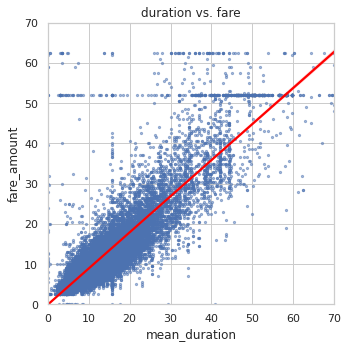

In [30]:
# Create a scatterplot to visualize the relationship between variables of interest
### YOUR CODE HERE ###
f = plt.figure( figsize = (5, 5))
sns.set(style = 'whitegrid')
sns.regplot(
    data = df, 
    x = 'mean_duration',
    y = 'fare_amount',
    scatter_kws={'alpha':0.5, 's':5},
    line_kws={'color':'red'}
)
plt.title('duration vs. fare')
plt.ylim(0, 70)
plt.xlim(0, 70)
plt.tight_layout()

The `mean_duration` variable correlates with the target variable. But what are the horizontal lines around fare amounts of 52 dollars and 63 dollars? What are the values and how many are there?

You know what one of the lines represents. 62 dollars and 50 cents is the maximum that was imputed for outliers, so all former outliers will now have fare amounts of \$62.50. What is the other line?

Check the value of the rides in the second horizontal line in the scatter plot.

In [31]:
### YOUR CODE HERE ###
df[df['fare_amount'] > 50]['fare_amount'].value_counts().head()

52.0    514
62.5     84
59.0      9
50.5      9
57.5      8
Name: fare_amount, dtype: int64

Examine the first 30 of these trips.

In [32]:
# Set pandas to display all columns
pd.set_option('display.max_columns', None)
df_52 = df[df['fare_amount'] == 52].reset_index(drop = True)
df_52.head(30)
### YOUR CODE HERE ###

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,weekday,hour,rush_hour
0,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,36.800000,236 132,19.211667,40.500000,5,3,6,19,0
1,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80,66.850000,132 163,19.229000,52.941667,3,6,5,14,0
2,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,0.966667,132 132,2.255862,3.021839,11,11,5,20,0
3,103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,18.93,2,N,132,79,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,29.183333,132 79,19.431667,47.275000,6,12,2,23,0
4,80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,17.99,2,N,132,234,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,29.483333,132 234,17.654000,49.833333,24,9,6,23,0
5,16226157,1,2017-02-28 18:30:05,2017-02-28 19:09:55,1,18.40,2,N,132,48,2,52.0,4.5,0.5,0.00,5.54,0.3,62.84,39.833333,132 48,18.761905,58.246032,28,2,1,18,1
6,55253442,2,2017-06-05 12:51:58,2017-06-05 13:07:35,1,4.73,2,N,228,88,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,15.616667,228 88,4.730000,15.616667,5,6,0,12,0
7,65900029,2,2017-08-03 22:47:14,2017-08-03 23:32:41,2,18.21,2,N,132,48,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,45.450000,132 48,18.761905,58.246032,3,8,3,22,0
8,80904240,2,2017-09-26 13:48:26,2017-09-26 14:31:17,1,17.27,2,N,186,132,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,42.850000,186 132,17.096000,42.920000,26,9,1,13,0
9,33706214,2,2017-04-23 21:34:48,2017-04-23 22:46:23,6,18.34,2,N,132,148,1,52.0,0.0,0.5,5.00,0.00,0.3,57.80,71.583333,132 148,17.994286,46.340476,23,4,6,21,0


**Question:** What do you notice about the first 30 trips?

same ratecodeid of 2 and the location id 132 is wether on dropoff or pick, same price could be that going to that location or start at that location will have a same flat price of 52. 
we can also clearly say the price fix to 52 for this location by examine the distance. for wether distance that are close or far away the fare amount is 52

### Task 5. Isolate modeling variables

Drop features that are redundant, irrelevant, or that will not be available in a deployed environment.

In [33]:
### YOUR CODE HERE ###
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

In [34]:
### YOUR CODE HERE ###
df1 = df.copy()

df1 = df[['VendorID', 'passenger_count', 'fare_amount', 'mean_distance','mean_duration','rush_hour']]
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


### Task 6. Pair plot

Create a pairplot to visualize pairwise relationships between `fare_amount`, `mean_duration`, and `mean_distance`.

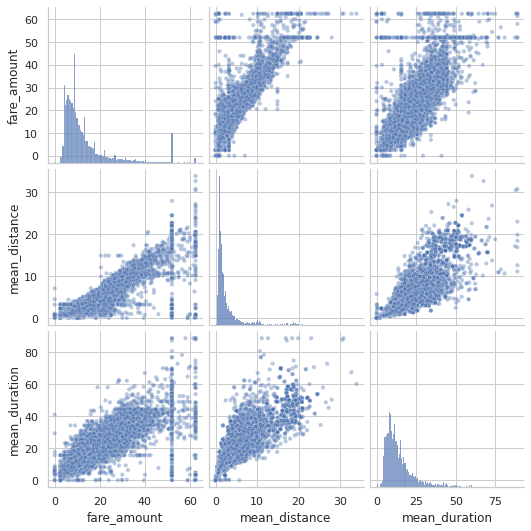

In [35]:
# Create a pairplot to visualize pairwise relationships between variables in the data
sns.pairplot(
    df1[['fare_amount','mean_distance', 'mean_duration']],
    plot_kws = {'alpha':0.4, 'size':0.5}
)
### YOUR CODE HERE ###

These variables all show linear correlation with each other. Investigate this further.

### Task 7. Identify correlations

Next, code a correlation matrix to help determine most correlated variables.

In [36]:
# Correlation matrix to help determine most correlated variables
corr_matrx = df1.corr(method = 'pearson')
corr_matrx
### YOUR CODE HERE ###

,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
VendorID,1.000000,0.266463,0.001045,0.004741,0.001876,-0.002874
passenger_count,0.266463,1.000000,0.014942,0.013428,0.015852,-0.022035
fare_amount,0.001045,0.014942,1.000000,0.910185,0.859105,-0.020075
mean_distance,0.004741,0.013428,0.910185,1.000000,0.874864,-0.039725
mean_duration,0.001876,0.015852,0.859105,0.874864,1.000000,-0.021583
rush_hour,-0.002874,-0.022035,-0.020075,-0.039725,-0.021583,1.000000


Visualize a correlation heatmap of the data.

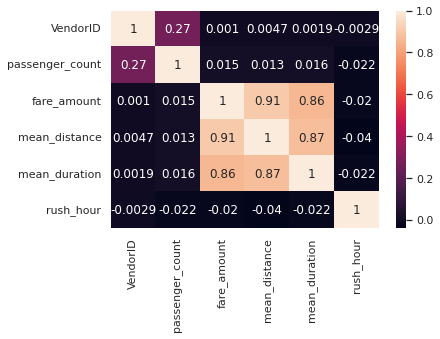

In [37]:
# Create correlation heatmap
sns.heatmap(corr_matrx, annot = True)
### YOUR CODE HERE ###

**Question:** Which variable(s) are correlated with the target variable of `fare_amount`? 

Try modeling with both variables even though they are correlated.   


fare amount have high corr with both mean_distance and mean_duration

<img src="images/Construct.png" width="100" height="100" align=left>

## PACE: **Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. Consider the questions in your PACE Strategy Document to reflect on the Construct stage.


### Task 8a. Split data into outcome variable and features

In [38]:
### YOUR CODE HERE ###


Set your X and y variables. X represents the features and y represents the outcome (target) variable.

In [39]:
# Remove the target column from the features
# X = df2.drop(columns='fare_amount')
X = df1.drop(columns = 'fare_amount')
### YOUR CODE HERE ###

# Set y variable
y = df1[['fare_amount']]
### YOUR CODE HERE ###

# Display first few rows
print(X.head())
print(y.head())
### YOUR CODE HERE ###


   VendorID  passenger_count  mean_distance  mean_duration  rush_hour
0         2                6       3.521667      22.847222          0
1         1                1       3.108889      24.470370          0
2         1                1       0.881429       7.250000          1
3         2                1       3.700000      30.250000          0
4         2                1       4.435000      14.616667          0
   fare_amount
0         13.0
1         16.0
2          6.5
3         20.5
4         16.5


### Task 8b. Pre-process data


Dummy encode categorical variables

In [40]:
# Convert VendorID to string
X['VendorID'] = X['VendorID'].astype(str)
### YOUR CODE HERE ###

# Get dummies
X = pd.get_dummies(X, drop_first = True)
print(X.head())
X.info()
### YOUR CODE HERE ###

   passenger_count  mean_distance  mean_duration  rush_hour  VendorID_2
0                6       3.521667      22.847222          0           1
1                1       3.108889      24.470370          0           0
2                1       0.881429       7.250000          1           0
3                1       3.700000      30.250000          0           1
4                1       4.435000      14.616667          0           1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_count  22699 non-null  int64  
 1   mean_distance    22699 non-null  float64
 2   mean_duration    22699 non-null  float64
 3   rush_hour        22699 non-null  int64  
 4   VendorID_2       22699 non-null  uint8  
dtypes: float64(2), int64(2), uint8(1)
memory usage: 731.6 KB


### Split data into training and test sets

Create training and testing sets. The test set should contain 20% of the total samples. Set `random_state=0`.

In [41]:
# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
#### YOUR CODE HERE ####


### Standardize the data

Use `StandardScaler()`, `fit()`, and `transform()` to standardize the `X_train` variables. Assign the results to a variable called `X_train_scaled`.

In [56]:
# Standardize the X variables
scaler  = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
print(X_train_scaled)
### YOUR CODE HERE ###

[[-0.50301524  0.8694684   0.17616665 -0.64893329  0.89286563]
 [-0.50301524 -0.60011281 -0.69829589  1.54099045  0.89286563]
 [ 0.27331093 -0.47829156 -0.57301906 -0.64893329 -1.11998936]
 ...
 [-0.50301524 -0.45121122 -0.6788917  -0.64893329 -1.11998936]
 [-0.50301524 -0.58944763 -0.85743597  1.54099045 -1.11998936]
 [ 1.82596329  0.83673851  1.13212101 -0.64893329  0.89286563]]


### Fit the model

Instantiate your model and fit it to the training data.

In [43]:
# Fit your model to the training data
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
### YOUR CODE HERE ###

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Task 8c. Evaluate model

### Train data

Evaluate your model performance by calculating the residual sum of squares and the explained variance score (R^2). Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [44]:
# Evaluate the model performance on the training data
r_sq = lr.score(X_train_scaled, y_train)
print('Coefficient of determination:', r_sq)
y_pred_train = lr.predict(X_train_scaled)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))
### YOUR CODE HERE ###

Coefficient of determination: 0.8398434585044773
R^2: 0.8398434585044773
MAE: 2.186666416775414
MSE: 17.88973296349268
RMSE: 4.229625629236313


### Test data

Calculate the same metrics on the test data. Remember to scale the `X_test` data using the scaler that was fit to the training data. Do not refit the scaler to the testing data, just transform it. Call the results `X_test_scaled`.

In [55]:
# Scale the X_test data
X_test_scaled = scaler.transform(X_test)
### YOUR CODE HERE ###

In [57]:
# Evaluate the model performance on the testing data
### YOUR CODE HERE ###
# Evaluate the model performance on the testing data
r_sq_test = lr.score(X_test_scaled, y_test)
print('Coefficient of determination:', r_sq_test)
y_pred_test = lr.predict(X_test_scaled)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))


Coefficient of determination: 0.8682583641795454
R^2: 0.8682583641795454
MAE: 2.1336549840593864
MSE: 14.326454156998944
RMSE: 3.785030271609323


<img src="images/Execute.png" width="100" height="100" align=left>

## PACE: **Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### Task 9a. Results

Use the code cell below to get `actual`,`predicted`, and `residual` for the testing set, and store them as columns in a `results` dataframe.

In [59]:
# Create a `results` dataframe
results = pd.DataFrame(
    data = {'actual': y_test['fare_amount'],
           'predicted': y_pred_test.ravel()}
)
results['residual'] = results['actual'] - results['predicted']
results.head()
### YOUR CODE HERE ###



,actual,predicted,residual
5818,14.0,12.356503,1.643497
18134,28.0,16.314595,11.685405
4655,5.5,6.726789,-1.226789
7378,15.5,16.227206,-0.727206
13914,9.5,10.536408,-1.036408


### Task 9b. Visualize model results

Create a scatterplot to visualize `actual` vs. `predicted`.

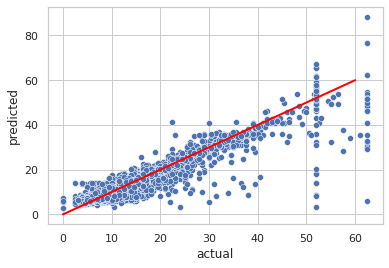

In [62]:
# Create a scatterplot to visualize `predicted` over `actual`
sns.scatterplot(
    x = results['actual'],
    y = results['predicted']
)
plt.plot([0,60], [0,60], c='red', linewidth=2)
### YOUR CODE HERE ###

Visualize the distribution of the `residuals` using a histogram.

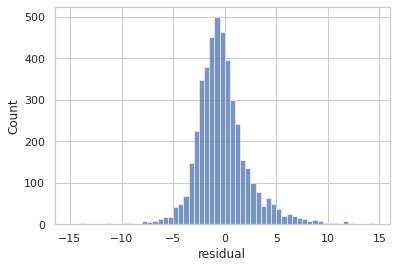

In [67]:
# Visualize the distribution of the `residuals`
sns.histplot(
    results['residual'],
    bins = np.arange(-15, 15, 0.5)
)
### YOUR CODE HERE ###



In [69]:
# Calculate residual mean
residual_mean = np.mean(results['residual'])
print(f'mean: {residual_mean}')
### YOUR CODE HERE ###

mean: -0.01544262152868053


Create a scatterplot of `residuals` over `predicted`.

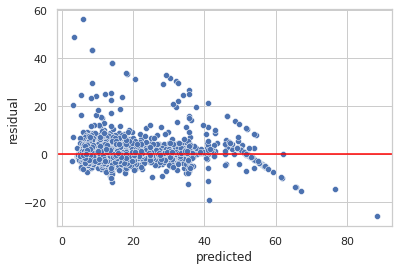

In [73]:
# Create a scatterplot of `residuals` over `predicted`
sns.scatterplot(
    x = results['predicted'],
    y = results['residual']
)
plt.axhline(0, c = 'red')
### YOUR CODE HERE ###

### Task 9c. Coefficients

Use the `coef_` attribute to get the model's coefficients. The coefficients are output in the order of the features that were used to train the model. Which feature had the greatest effect on trip fare?

In [77]:
# Output the model's coefficients
coeff = pd.DataFrame(lr.coef_, columns = X.columns)
coeff

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,0.030825,7.133867,2.812115,0.110233,-0.054373


What do these coefficients mean? How should they be interpreted?

==> ENTER YOUR RESPONSE HERE 


### Task 9d. Conclusion

1. What are the key takeaways from this notebook?



2. What results can be presented from this notebook?



==> ENTER YOUR RESPONSE HERE 

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged. 

In [79]:
# prediction on full data 
X_scaled = scaler.transform(X)
y_preds_full = lr.predict(X_scaled)

In [83]:
# Create a new df containing just the RatecodeID col from the whole dataset
final_preds = df[['RatecodeID']].copy()

# Add a column containing all the predictions
final_preds['y_preds_full'] = y_preds_full

# Impute a prediction of 52 at all rows where RatecodeID == 2
final_preds.loc[final_preds['RatecodeID']==2, 'y_preds_full'] = 52

# Check that it worked
final_preds[final_preds['RatecodeID']==2].head()

,RatecodeID,y_preds_full
11,2,52.0
110,2,52.0
161,2,52.0
247,2,52.0
379,2,52.0


In [84]:
final_preds = final_preds['y_preds_full']
print('R^2:', r2_score(y, final_preds))
print('MAE:', mean_absolute_error(y, final_preds))
print('MSE:', mean_squared_error(y, final_preds))
print('RMSE:',np.sqrt(mean_squared_error(y, final_preds)))

R^2: 0.8910853978683975
MAE: 1.992506252269974
MSE: 12.101575504689935
RMSE: 3.4787318816905013


In [85]:
# Combine means columns with predictions column
nyc_preds_means = df[['mean_duration', 'mean_distance']].copy()
nyc_preds_means['predicted_fare'] = final_preds

nyc_preds_means.head()

,mean_duration,mean_distance,predicted_fare
0,22.847222,3.521667,16.434245
1,24.470370,3.108889,16.052218
2,7.250000,0.881429,7.053706
3,30.250000,3.700000,18.731650
4,14.616667,4.435000,15.845642
